In [1]:
import numpy as np
import pandas as pd
from decision_tree import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import call
import cv2

In [2]:
# To pre process the data to make it acceptable for using in a decision tree

def preProcess(N):
    N["Area"] = pd.cut(N["Area"], bins = [0, int(N["Area"].mean()), N["Area"].max() + 1], labels = [0,1])
    N["MajorAxisLength"] = pd.cut(N["MajorAxisLength"], bins = [0, int(N["MajorAxisLength"].mean()), N["MajorAxisLength"].max() + 1], labels = [0,1])
    N["MinorAxisLength"] = pd.cut(N["MinorAxisLength"], bins = [0, int(N["MinorAxisLength"].mean()), N["MinorAxisLength"].max() + 1], labels = [0,1])
    N["Eccentricity"] = pd.cut(N["Eccentricity"], bins = [0, N["Eccentricity"].mean(), N["Eccentricity"].max() + 1], labels = [0,1])
    N["ConvexArea"] = pd.cut(N["ConvexArea"], bins = [0, int(N["ConvexArea"].mean()), N["ConvexArea"].max() + 1], labels = [0,1])
    N["Extent"] = pd.cut(N["Extent"], bins = [0, N["Extent"].mean(), N["Extent"].max() + 1], labels = [0,1])
    N["Perimeter"] = pd.cut(N["Perimeter"], bins = [0, int(N["Perimeter"].mean()), N["Perimeter"].max() + 1], labels = [0,1])    
    
    N['Class'].replace(['Kecimen', 'Besni'], [0, 1], inplace=True)
    
    return N.to_numpy()

#  About The Dataset

    Raisin Dataset: https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset
    
    Goal: To classify raisins into Besni and Kecimen
    
    Attributes:
    1.) Area: Gives the number of pixels within the boundaries of the raisin. - continuous
    2.) Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels
                   around it. - continuous
    3.) MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the 
                         raisin. - continuous
    4.) MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin. 
                         - continuous
    5.) Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as 
                        raisins. - continuous
    6.) ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin. - continuous
    7.) Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box. - continuous
        

In [3]:
# Reads data from the data files and split them into training and testing data

def readData():
    N = pd.read_csv('raisin_data/Raisin_Dataset.txt',  sep="\t")    
    M = preProcess(N)
    
    y = M[:, -1]
    x = M[:, :-2]
        
    Xtrn, Xtst, ytrn, ytst = train_test_split(x, y, test_size=0.25, random_state=42)

    return ytrn, Xtrn, ytst, Xtst 


#  Section C/E

    For Raisin Dataset
       - Learning decision tress using our algorithm for dephts [1,3,5]
       - Visualising the dree in the form of a .dot file
       - Generating a confusion matrix using scikit learn


Confusion matrix for depth 1
[[105  15]
 [ 16  89]]

Confusion matrix for depth 3
[[102  18]
 [ 14  91]]

Confusion matrix for depth 5
[[102  18]
 [ 14  91]]



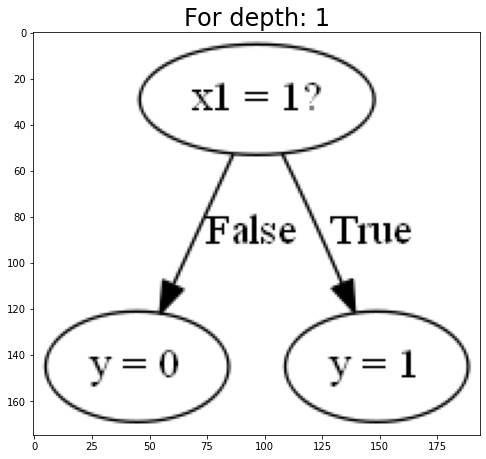

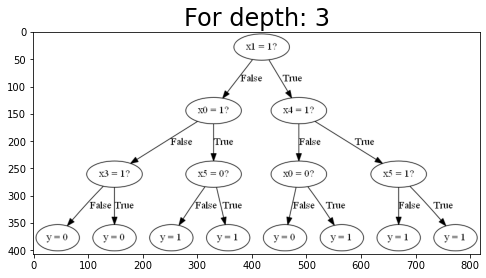

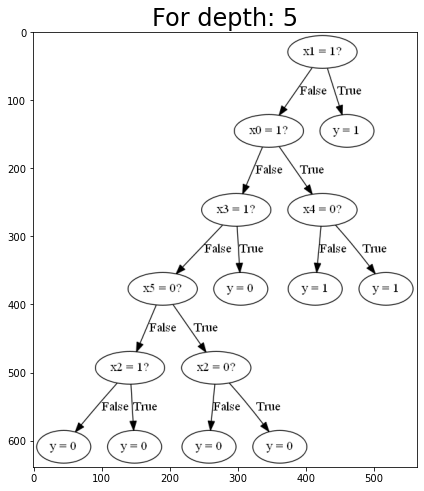

In [4]:
ytrn, Xtrn, ytst, Xtst = readData()
depths = [1,3,5]

for i in depths:
    attr_val_pairs = generateAttributeValuePairs(Xtrn)
    tree = id3(Xtrn, ytrn, attr_val_pairs, max_depth=i)
    
    y_dt=np.array([predict_example(x,tree) for x in Xtst])
    
    print('Confusion matrix for depth {}'.format(i))
    print(confusion_matrix(ytst, y_dt))
    print()
    
    render_dot_file(to_graphviz(tree), './my_learned_tree_depth{}'.format(i))
    call(['dot', '-T', 'png', 'my_learned_tree_depth' + str(i) + '.dot', '-o', 'my_learned_tree_depth' + str(i) + '.png'])
    img = cv2.imread('my_learned_tree_depth' + str(i) + '.png')
    plt.figure(figsize = (8, 8))
    plt.title("For depth: "+ str(i), fontsize="24")
    plt.imshow(img)




#  Section D/E

    For monks-1 Dataset
       - Learning decision tress scikit learn's DecisionTreeClassifier for dephts [1,3,5]
       - Visualising the dree in the form of a .dot file
       - Generating a confusion matrix using scikit learn



Confusion matrix for depth 1
[[105  15]
 [ 16  89]]

Confusion matrix for depth 3
[[105  15]
 [ 16  89]]

Confusion matrix for depth 5
[[105  15]
 [ 16  89]]



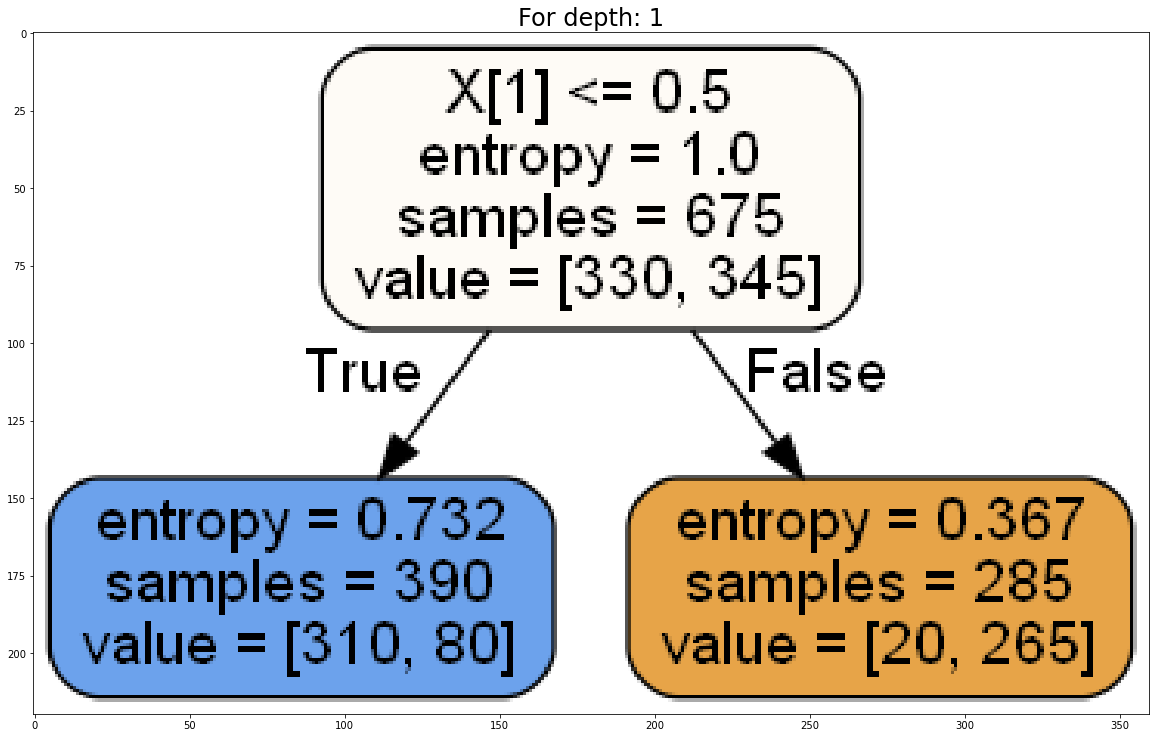

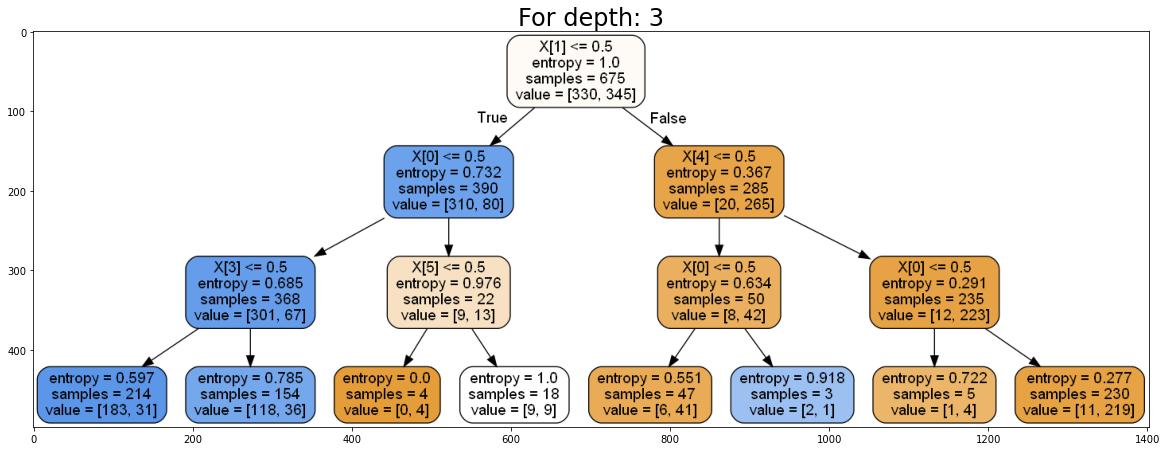

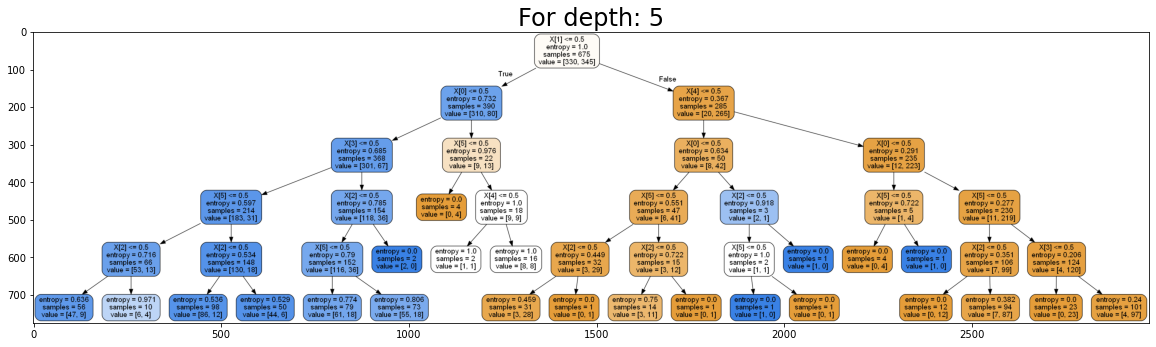

In [10]:
ytrn, Xtrn, ytst, Xtst = readData()
attr_val_pairs = generateAttributeValuePairs(Xtrn)

depths = [1,3,5]

for i in depths:
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree = decision_tree.fit(Xtrn, ytrn)
    
    predictions = decision_tree.predict(Xtst)
    err = compute_error(ytst, predictions)
    
    print('Confusion matrix for depth {}'.format(i))
    print(confusion_matrix(ytst, predictions))
    print()
    
    export_graphviz(decision_tree,out_file ="myTreeName_" + str(i) + ".dot",filled=True,rounded=True)
    call(['dot', '-T', 'png', 'myTreeName_' + str(i) + '.dot', '-o', 'myTreeName_' + str(i) + '.png'])
    img = cv2.imread('myTreeName_' + str(i) + '.png')
    plt.figure(figsize = (20, 20))
    plt.title("For depth: "+ str(i), fontsize="24")
    plt.imshow(img)

#    
    Comparing the confusion matrices generatred by the id3 alogrithm and the confusion matrices 
    generated by the scikit learn's DecisionTreeClassifier algorithm, we can see that the DecisionTreeClassifier 
    gives a bit more accurate results and hence it is used widely by data scientists for solving 
    classification problems.    